## Welcome to the Browser Wars (1995 - )
<p><img src="https://assets.datacamp.com/production/project_1172/img/browser.png" alt="Browser on desktop, tablet, and phone"></p>
<p>In the mid 1990s, the First Browser War began with Netscape Navigator and Microsoft Internet Explorer fighting for dominance. By 2001, Internet Explorer was the clear winner, but it was not long before the Second Browser Wars began (2004-2017). This coincided with the rise of smartphones, which emphasized the need and competitiveness for more mobile-friendly versions of browsers. <a href="https://en.wikipedia.org/wiki/Browser_wars">[1]</a></p>
<p>In this notebook, we'll analyze the worldwide popularity of browsers over time using Google Trends. Although this won't give us direct market share figures, we can use Google Trends to get a sense of interest of a given browser over time and how that interest compares to other browsers. In particular, we will be looking at five major players over the past two decades: Mozilla Firefox (2002-), Apple's Safari (2002-), Google Chrome (2008-), Microsoft Internet Explorer (1995-2020), and Opera (1995-).</p>
<p>The dataset you will use was downloaded as a CSV from this <a href="https://trends.google.com/trends/explore?date=all&q=%2Fm%2F01dyhm,%2Fm%2F0168s_,%2Fm%2F04j7cyf,%2Fm%2F03xw0,%2Fm%2F01z7gs">Google Trends query</a> in mid-October of 2020. Here are the details:</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/worldwide_browser_trends.csv</b></div>
This is a time series indexed by month with the search interest for each browser.
<ul>
    <li><b>Month:</b> each month from 2004-01 to 2020-10</li>
    <li><b>Firefox:</b> search interest for Firefox</li>
    <li><b>Safari:</b> search interest for Safari</li>
    <li><b>Google Chrome:</b> search interest for Chrome</li>
    <li><b>Internet Explorer:</b> search interest for Internet Explorer</li>
    <li><b>Opera:</b> search interest for Opera</li>
</ul>
</div>
<p>Google defines the values of search interest as:</p>
<blockquote>
  <p>Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.</p>
</blockquote>
<p>Best of luck and may the best browser win!</p>

In [13]:
import pandas as pd

# date col is "Month", parse dates on read and set index as "Month"
df = pd.read_csv("datasets/worldwide_browser_trends.csv", parse_dates=["Month"], index_col='Month')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2004-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Firefox            202 non-null    int64
 1   Safari             202 non-null    int64
 2   Google Chrome      202 non-null    int64
 3   Internet Explorer  202 non-null    int64
 4   Opera              202 non-null    int64
dtypes: int64(5)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Month'>

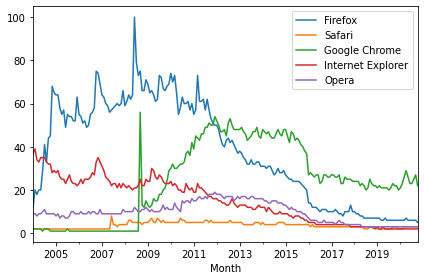

In [14]:
df.plot()

- Firefox while initially behind Internet Explorer at first, rose in popularity, and became the most popular browser for a while, until it declined, and was overtaken by Google Chrome.

- The plot seems to show Safari to be quite low, but it doesn't seem representative of the actual data of how many people actually use Safari. Safari comes with Apple devices so there's really no need to actually Google it in order to download it. The Google Trends data shows how many people searched for the terms in question, if Safari is already downloaded, there really is no reason for users to search it. However for the purposes of this project, we can just assume that Safari holds a low position in the "browser wars".

- Once Google Chrome was launched it overtook Firefox, and became the most popular browser, and still is to this day.

- Internet Explorer was the most popular browser in the Early 2000s, but once Firefox overtook it you can see a noticeable decline on the graph. While the data doesn't seem to go to the current data, it's important to note it was eventually discontinued in 2022.

- Opera never really took off, besides a slight bump in usage from 2011-2015 it remained consistent in it's usage. It did slightly decline near the end of the graph

## 1. Find the six month rolling average (a.k.a. simple moving average) for each date and browser in the dataset. Save your answer as pandas DataFrame called rolling_six with the column Month as the index. Null values are acceptable for dates where a rolling six month average can't be generated.

In [15]:
rolling_six = df.rolling(window=6).mean()

# you could just leave the first five vals to be NaN/null values
# BUT min_periods=1 means use available rows until window is filled
# rolling_six = df.rolling(window=6, min_periods=1).mean()

rolling_six.head(12)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN,NaN,NaN
2004-06-01,19.833333,2.0,1.833333,35.500000,9.000000
2004-07-01,24.666667,2.0,1.833333,35.166667,9.333333
2004-08-01,26.833333,2.0,1.833333,34.166667,9.333333
2004-09-01,31.166667,2.0,1.833333,33.833333,9.500000


<AxesSubplot:title={'center':'6 Month Rolling Avg'}, xlabel='Month'>

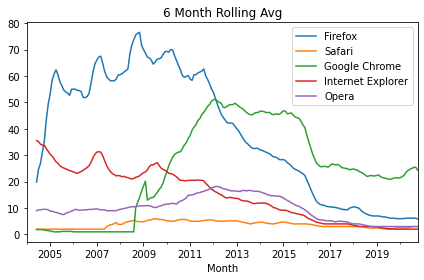

In [16]:
# smoother peaks on rolling_six
rolling_six.plot(title="6 Month Rolling Avg")

## 2. Similar to above, create a DataFrame called pct_change_quarterly with the percentage change from the previous quarter for each date and browser. The values should be in percentage format, so 5 instead of 0.05. Since Chrome launched in late 2008, only include dates during or after 2009.


array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>], dtype=object)

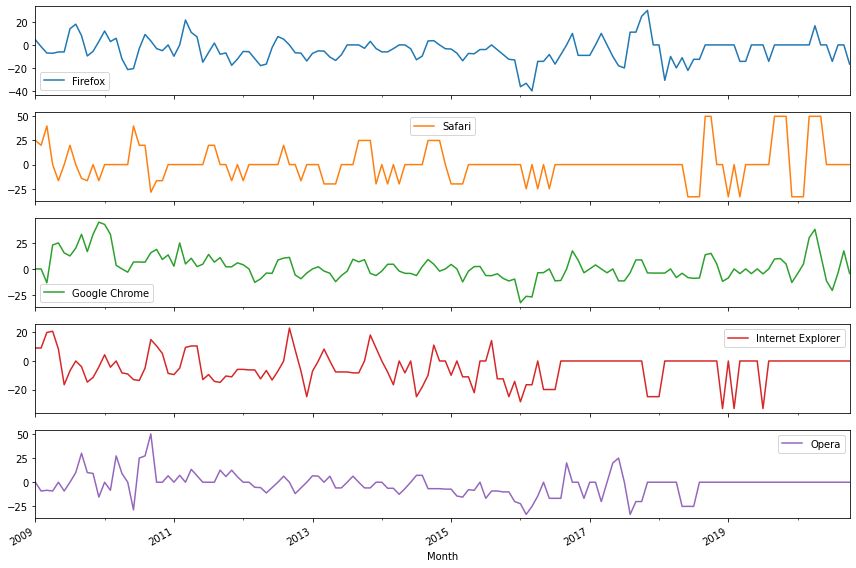

In [17]:
# window/period size is quarter in this question (3 months)
pct_change_quarterly = df.pct_change(periods=3)*100

# must only consider data from 2009 and on onwards
pct_change_quarterly = pct_change_quarterly.loc["2009":]

pct_change_quarterly.plot(subplots=True, figsize=[12,8])

## 3. From the earlier questions, you can see that even though Chrome eventually overtook Firefox, Chrome's growth has had its fair share of ups and downs. You will illustrate this by comparing Chrome's annual Google Trends performance in 2009, 2012, 2015, and 2018 in a DataFrame called chrome_trends. It should hold the search interest for Chrome with four columns for each year and twelve rows for each month of the year.


In [18]:
def browser_trends(yrs, browser):
    trends = pd.DataFrame()

    for year in yrs:
        trends_per_yr = df.loc[year, [browser]].reset_index(drop=True)
        trends_per_yr.rename(columns={browser: year}, inplace=True)
        trends = pd.concat([trends, trends_per_yr], axis=1)
        
    return trends

<AxesSubplot:>

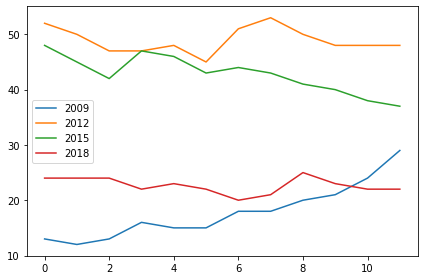

In [19]:
years_of_interest = ["2009", "2012", "2015", "2018"]
browser_of_interest = "Google Chrome"

chrome_trends = browser_trends(years_of_interest, browser_of_interest)

chrome_trends.plot()

<AxesSubplot:>

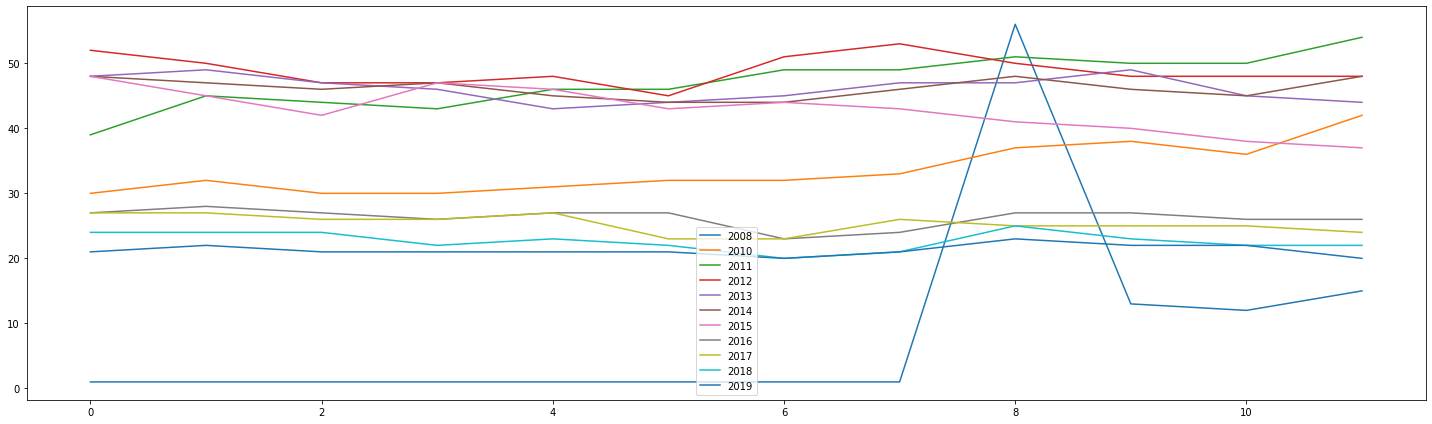

In [20]:
all_yrs_chrome = ["2008", "2010", "2011", "2012", "2013", "2014", "2015","2016", "2017", "2018", "2019"]
browser_of_interest = "Google Chrome"

entire_chrome_trends = browser_trends(all_yrs_chrome, browser_of_interest)
entire_chrome_trends.plot(figsize=[20,6])

### Chrome's best years were 2011-2012. Chrome's release in late 2008 also saw it taking up a large amount of market share, but that quickly dipped. It's interesting to note Chrome's market fell significantly 2016 onwards, and got closer to it's market share in 2009 near the latter years.

In [33]:
# we can take a look at monthly winners for market share
# with .idxmax. set axis to 1 for col wise max
monthly_winners = df.idxmax(axis=1)

monthly_winners.head(10)

Month
2004-01-01    Internet Explorer
2004-02-01    Internet Explorer
2004-03-01    Internet Explorer
2004-04-01    Internet Explorer
2004-05-01    Internet Explorer
2004-06-01    Internet Explorer
2004-07-01              Firefox
2004-08-01              Firefox
2004-09-01              Firefox
2004-10-01              Firefox
dtype: object

In [22]:
# count total months each browser was the leader
months_as_leader = monthly_winners.value_counts()
print(months_as_leader)

# Chrome spent the most time as dominant browser. Held the most market share
# for theh longest time.

Google Chrome        107
Firefox               89
Internet Explorer      6
dtype: int64
